In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import linear_model

from tqdm import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Code to run on G-colab

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#code to run only on G-colab 
gcolab_project_path = '/content/drive/My Drive/My AI Repository/Dataset/'
gcolab_project_path

'/content/drive/My Drive/My AI Repository/Dataset/'

**Load Dataset: IRIS**

In [5]:
#Code to run on G-colab
df_iris = pd.read_csv(gcolab_project_path+'IRIS.csv')

In [6]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


IRIS dataset contains 3 categories/classess. We need only two(binary) classes for the classification purpose. 
<br>SVM is a supervised machine learning classification algorithm.
<br>Let us remove the last classification /class called 'Virginica'  

In [8]:
df_iris = df_iris[0:100]
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


split IRIS dataset 
<br>1)   X (features) and y(labels)
<br>2)   In X, our focus is into SepalLength and PetalLength (1, 3 --> indices)

In [9]:
#Extracts only two inputs feature (X) and a target (y) 
df_iris = df_iris.loc[:, ['sepal_length','petal_length', 'species']]

#Split into X and y
X = df_iris.loc[:, ['sepal_length','petal_length']]
y = df_iris.loc[:, ['species']]


In [10]:
X.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [11]:
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


**Visualize Sepal_Lenth vs Petal_Length**

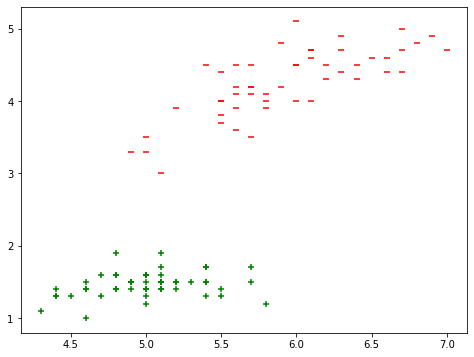

In [12]:
x_tmp = df_iris['sepal_length']
y_tmp = df_iris['petal_length']

setosa_x = x_tmp[:50]
setosa_y = y_tmp[:50]

versicolor_x = x_tmp[50:]
versicolor_y = y_tmp[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

**Inference: From the above graph, a linear line can be used to separate the data points**

Encode target /(y) values for system classificiation purpose
<br> Iris-setosa as -1
<br> Iris-versicolor as 1

In [13]:

setosa = [-1 for i in range(50)]  #1st 50 dataset for setosa
versicolor = [1 for i in range(50)] #final 50 dataset for versicolor

In [14]:
#contactenate newly encoded values into 'y'/target column

arr_y = np.concatenate([setosa,versicolor ])

In [15]:
print('Encoded value for Setosa', arr_y[0:5])
print('Encoded value for Versicolor', arr_y[95:100])

Encoded value for Setosa [-1 -1 -1 -1 -1]
Encoded value for Versicolor [1 1 1 1 1]


In [16]:
type(X), type(arr_y)

(pandas.core.frame.DataFrame, numpy.ndarray)

**Assign the encoded column value into y (target) dataframe**

In [17]:
y = arr_y    #replaces the encoded values in arr_y -> dataframe y

**Shuffle and Split Dataset by our customized logic**

In [18]:
#Random permutation for shuffling the dataset
perm = np.random.permutation(len(X))
type(perm), perm

(numpy.ndarray,
 array([47, 65, 84, 82,  4, 50, 71, 26, 20, 32, 99, 22, 93, 52, 17, 86, 39,
         2, 24, 29, 38, 87, 36, 25, 64, 44, 98,  8, 69, 43, 35, 89, 54, 40,
        30, 28, 77, 92, 59, 70, 80, 37, 48, 53, 12,  3, 51, 63, 18, 33,  6,
        62, 31, 56, 91, 75,  0, 88, 16, 41, 10, 15, 96, 72, 94, 81, 14, 67,
        21, 61, 13,  7, 58, 73, 60, 57, 76, 83, 34, 49, 42, 11, 95, 85, 45,
        68, 23, 74, 78, 97, 66,  1, 19, 55, 79,  5, 27, 90, 46,  9]))

**Split Train and Test using randomized shuffling
Split ratio 90(train):10(test)**

In [19]:
#Split the datset into Train(X) & Test (y) by the generated Permutation number indices

X_train, X_test =  X.iloc[perm][10:], X.iloc[perm][:10]     #X -> Dataframe object
y_train, y_test =  y[perm][10:], y[perm][:10]               #y -> NumPy array

**Convert Features(X) into NumPy array objects**

In [20]:
X_train = np.array(X_train);   X_test = np.array(X_test)

In [21]:
y_train = y_train.reshape(90,1);    y_test = y_test.reshape(10,1)

In [22]:
print("Dataset Shape:")
print("==============")
print(f"X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\t y_test: {y_test.shape}")

Dataset Shape:
X_train: (90, 2) y_train: (90, 1)
X_test: (10, 2)	 y_test: (10, 1)


In [23]:
type(X_train), type(X_test), type(y_train), type(y_test)   #Enusre that data types (NumPy) are consistent 

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

**Implement SVM Algorithm**

**Split those two features separately into f1 and f2**

In [24]:
train_f1 = X_train[:,0]    #extracts 1st column sepal length & stores it into train_f1
train_f2 = X_train[:,1]    #extracts 2nd column petal length & stores it into train_f2

#reshape features to align/synch up with the actual/target value y dimension (n, 1)
train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

In [25]:
train_f1.shape, train_f2.shape

((90, 1), (90, 1))

**Initialize Weights and Parameters**

In [26]:
w1 = np.zeros(train_f1.shape)
w2 = np.zeros(train_f2.shape)

epochs = 1
alpha = 0.0001

**Implement SVM-Core Functionality**

In [27]:
cost_train = []
while (epochs < 10000):

    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
  
    if epochs%500 == 0:      print(f"Iteration: {epochs}")
  
    count = 0
    for val in prod:
        if(val >= 1):         #Updates the gradient from the regularization parameter; if the model correctly predicts our data (no mis-classification)
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)       #α -> alpha(0.0001) is the learning rate 
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:                 #Includes the loss along with the regularization parameter to perform gradient update, a misclassification in prediction by the system.
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)    #the regularization parameter λ is set to 1/epochs.
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)    #the regularizing value reduces the number of epochs increases
        
        count += 1
        cost_train.append(cost)
    
    epochs += 1


Iteration: 500
Iteration: 1000
Iteration: 1500
Iteration: 2000
Iteration: 2500
Iteration: 3000
Iteration: 3500
Iteration: 4000
Iteration: 4500
Iteration: 5000
Iteration: 5500
Iteration: 6000
Iteration: 6500
Iteration: 7000
Iteration: 7500
Iteration: 8000
Iteration: 8500
Iteration: 9000
Iteration: 9500


**Accuracy Score produced by our customized SVM algorithm:**

In [28]:
from sklearn.metrics import accuracy_score

## Clip the weights 
index = list(range(10,90))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)

## Extract the test data features 
test_f1 = X_test[:,0]
test_f2 = X_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)
## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))

1.0


**Accuracy Score produced using sklearn's SVM library:**

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

1.0


**Do a real test/predict the SVM Algorithm using random sample data**

In [60]:
#Random data of sepal_lenth and petal_length (our expected prediction is Setosa) 
#test_f1 = np.array([4.3, 4.2, 4.7])
#test_f2 = np.array([1.0, 1.1, 1.3])

#Random data of sepal_lenth and petal_length (our expected prediction is Versicolor)
test_f1 = np.array([5.3, 5.4, 5.2])
test_f2 = np.array([4.4, 4.7, 4.6])

W1 = w1.mean();   W2 = w2.mean()    #Averaging mean prior applying on the equation.

y_pred = W1 * test_f1 + W2 * test_f2
predictions = []

for val in y_pred:

    if(val.mean() > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

pred_avg_val = sum(predictions) // len(predictions)    #Compute prediction's average 

if pred_avg_val == 1:
  print('Given set of flower data belongs to Versicolor')
elif pred_avg_val == -1:
  print('Given set of flower data belongs to Setosa')

Given set of flower data belongs to Versicolor
